In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['line', 'direction', 'station_diva_id', 'date', 'should_arrive_at', 
              'actually_arrived_at', 'next_station_diva_nach']
stationDS = pd.DataFrame(columns=col_names)
targetStationId = 2572

In [3]:
csv_names = ['fahrzeiten_soll_ist_20190623_20190629.csv',
             'fahrzeiten_soll_ist_20190616_20190622.csv', 
             'fahrzeiten_soll_ist_20190609_20190615.csv']

for name in csv_names:
    dataSet = pd.read_csv('data/' + name)
    ds = dataSet.loc[:, ['linie', 'richtung', 'halt_diva_von', 'datum_von', 'soll_an_von', 'ist_an_von', 'halt_diva_nach']]
    ds = ds.loc[ds['halt_diva_von'] == targetStationId]
    ds.columns = col_names
    stationDS = stationDS.append(ds)   

In [4]:
print('stationDS data shape: ', stationDS.shape)
stationDS = stationDS.sort_values(by='date', ascending=True)
stationDS.head(10)

stationDS data shape:  (31337, 7)


,line,direction,station_diva_id,date,should_arrive_at,actually_arrived_at,next_station_diva_nach
60137,62,2,2572,09.06.19,70278,70237,3034
60128,62,2,2572,09.06.19,20472,20482,3034
60127,62,2,2572,09.06.19,77472,77506,3034
60126,62,2,2572,09.06.19,40278,40304,3034
60125,62,2,2572,09.06.19,53478,53497,3034
60124,62,2,2572,09.06.19,66678,66706,3034
60123,62,2,2572,09.06.19,29472,29469,3034
60122,62,2,2572,09.06.19,60678,60775,3034
60129,62,2,2572,09.06.19,18192,18182,3034
60121,62,2,2572,09.06.19,34872,34910,3034


In [ ]:
# fileToSave = 'data/generated/station_' + str(targetStationId) + '.csv'
# targetStationData.to_csv(fileToSave, encoding='utf-8', index=False)

Data types of the columns

In [5]:
stationDS.dtypes

line                      object
direction                 object
station_diva_id           object
date                      object
should_arrive_at          object
actually_arrived_at       object
next_station_diva_nach    object
dtype: object

[8, 10, 11, 12, 14, 15, 17, 61, 62, 75, 94]


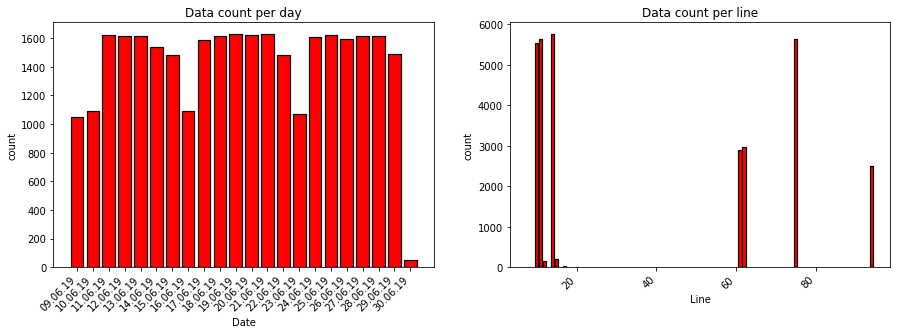

In [25]:
ds = stationDS

# fig, ax = plt.subplots()
# ax.set_title('Data count per day')
# ax.set_ylabel('count')
# ax.plot(count_per_day.index, count_per_day.line)
# ax.margins(x=0, y=0)

# plt.hist(ds.date)
# plt.ylabel('Data count per day');


# Set up the plotting layout
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 45)

ax1.set_xlabel('Date'); ax1.set_ylabel('count'); ax1.set_title('Data count per day')
# ax1.hist(ds.date)
count_per_day = ds.groupby('date').count()
ax1.bar(count_per_day.index, count_per_day.line, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);


ax2.set_xlabel('Line'); ax2.set_ylabel('count'); ax2.set_title('Data count per line')
# ax2.hist(ds.line);
count_per_line = ds.groupby('line').count()
ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);
lines = ds.line.unique()
print(sorted(lines))
# plt.xticks(count_per_line.index, count_per_line['index'].apply(str), rotation='vertical')

In [83]:
features = ds;
# Add column to represent day of week
features['date'] = pd.to_datetime(features['date'])
features['day_of_week'] = features['date'].dt.weekday

# split date into day, month, year
features['day'] = features['date'].dt.day
features['month'] = features['date'].dt.month
# features['year'] = features['date'].dt.year

# drop date column because we splitted it
features = features.drop('date', axis = 1)

# calculate delay time by subtracting y-x
# delays in sec --> y (target)
features['delays'] = features['actually_arrived_at'] - features['should_arrive_at']

# drop 'actually_arrived_at' column because we have delays now!
features = features.drop('actually_arrived_at', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

print(features.shape)
features.head()
# ds.day_of_week.unique()

(31337, 10)


,line,direction,station_diva_id,should_arrive_at,next_station_diva_nach,day_of_week,day,month,year,delays
60137,62,2,2572,70278,3034,4,6,9,2019,-41
60128,62,2,2572,20472,3034,4,6,9,2019,10
60127,62,2,2572,77472,3034,4,6,9,2019,34
60126,62,2,2572,40278,3034,4,6,9,2019,26
60125,62,2,2572,53478,3034,4,6,9,2019,19


In [70]:
#delays

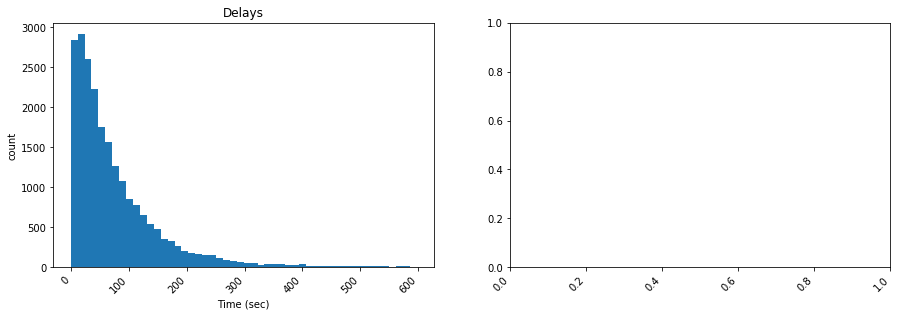

In [81]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 45)

filteredDS = features[(features['delays'] >= 0) & (features['delays'] < 600)]
# delays2.head()

ax1.set_xlabel('Time (sec)'); ax1.set_ylabel('count'); ax1.set_title('Delays')
ax1.hist(filteredDS.delays, bins=50);
# ax1.scatter(delays, delays);
# count_per_line = ds.groupby('line').count()
# ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);

In [38]:
# Convert to numpy array
features = np.array(features)
labels = np.array(delays)

In [39]:
print(features[:5])
print(labels[:5])

[[62 2 2572 70278 3034 4 6 9 2019]
 [62 2 2572 20472 3034 4 6 9 2019]
 [62 2 2572 77472 3034 4 6 9 2019]
 [62 2 2572 40278 3034 4 6 9 2019]
 [62 2 2572 53478 3034 4 6 9 2019]]
[-41 10 34 26 19]


In [40]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.20, random_state = 42
);

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (25069, 9)
Training Labels Shape: (25069,)
Testing Features Shape: (6268, 9)
Testing Labels Shape: (6268,)


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [42]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [45]:
print(test_labels[:15])
print(predictions[:15])

[83 -28 49 85 32 63 -32 10 222 10 53 -9 89 60 269]
[  5.353 -31.377  39.075  68.153  25.631  14.712   6.416  49.467 211.706
   8.85  113.407  15.579 -10.526  26.397 109.198]


In [51]:


# Calculate the absolute errors
errors = abs(predictions - test_labels)
l2_norm =  np.square(errors)
print('l2 Error:', round(np.mean(l2_norm), 2), 'degrees.')
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * ((errors + 1 + 6353) / (test_labels + 1 + 6353))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape - 6353 - 1)
print('Accuracy:', round(accuracy, 2), '%.')

l2 Error: 28921.13 degrees.
Accuracy: 5948.31 %.
